In [1]:
import pandas as pd
people = pd.read_csv('data/people.csv')
sample = pd.read_csv('data/sample_submission.csv')
train = pd.read_csv('data/act_train.csv')
test = pd.read_csv('data/act_test.csv')

In [2]:
data = train.drop('outcome', axis=1)

In [3]:
result = data.append(test, ignore_index=True)

In [4]:
data_out = pd.merge(result, people, how='left', on='people_id')

In [5]:
data_out.shape[0] == train.shape[0] + test.shape[0]

True

In [6]:
check = data_out.drop('activity_id', axis=1)

In [8]:
from sklearn.preprocessing import LabelEncoder
for column in check.columns:
    if check[column].dtype.name == 'object' or check[column].dtype.name == 'bool':
        en = LabelEncoder()
        check[column] = en.fit_transform(check[column])
    

/home/ubuntu/anaconda2/lib/python2.7/site-packages/numpy/lib/arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


In [46]:
check_join = pd.concat([data_out[['activity_id']], check], axis=1)

In [47]:
train_data = check_join[0:train.shape[0]]

In [48]:
test_data = check_join[train.shape[0]:]

In [49]:
train_data

,activity_id,people_id,date_x,activity_category,char_1_x,char_2_x,char_3_x,char_4_x,char_5_x,char_6_x,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,act2_1734928,0,405,3,0,0,0,0,0,0,...,0,1,1,0,0,1,1,1,0,36
1,act2_2434093,0,72,1,0,0,0,0,0,0,...,0,1,1,0,0,1,1,1,0,36
2,act2_3404049,0,72,1,0,0,0,0,0,0,...,0,1,1,0,0,1,1,1,0,36
3,act2_3651215,0,383,1,0,0,0,0,0,0,...,0,1,1,0,0,1,1,1,0,36
4,act2_4109017,0,405,1,0,0,0,0,0,0,...,0,1,1,0,0,1,1,1,0,36
5,act2_898576,0,383,3,0,0,0,0,0,0,...,0,1,1,0,0,1,1,1,0,36
6,act2_1233489,1,129,1,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,0,76
7,act2_1623405,1,129,1,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,0,76
8,act2_1111598,2,205,1,0,0,0,0,0,0,...,0,0,1,1,1,1,0,1,1,99
9,act2_1177453,2,346,1,0,0,0,0,0,0,...,0,0,1,1,1,1,0,1,1,99


In [50]:
train_data.shape[0] == train.shape[0]

True

In [51]:
test_data.shape[0] == test_data.shape[0]

True

In [52]:
training = train_data.drop('activity_id', axis =1)
label = train['outcome']

In [54]:
from sklearn.preprocessing import StandardScaler, Imputer
impute = Imputer()
training = pd.DataFrame(impute.fit_transform(training), index=training.index)
std = StandardScaler()
training = pd.DataFrame(std.fit_transform(training), index=training.index)

In [55]:
training.shape[0] == label.shape[0]

True

In [56]:
from sklearn.cross_validation import train_test_split
training_data, testing_data, training_label, testing_label = train_test_split(training, label, 
                                                                        random_state=123, test_size=0.2, stratify=label)

In [57]:
training_data

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
1697301,0.897994,0.465404,-0.759042,-0.210644,-0.227097,-0.244006,-0.258705,-0.232454,-0.256202,-0.234110,...,-0.441534,-0.505946,-0.605807,-0.605081,-0.521910,-0.727039,-0.502079,-0.699059,-0.609448,0.360795
642502,-0.696554,0.320136,-0.759042,-0.210644,-0.227097,-0.244006,-0.258705,-0.232454,-0.256202,-0.234110,...,-0.441534,-0.505946,-0.605807,-0.605081,-0.521910,-0.727039,-0.502079,-0.699059,-0.609448,0.111388
901295,-0.266516,0.619751,-0.759042,-0.210644,-0.227097,-0.244006,-0.258705,-0.232454,-0.256202,-0.234110,...,-0.441534,-0.505946,-0.605807,-0.605081,-0.521910,-0.727039,-0.502079,-0.699059,-0.609448,-1.385056
1792946,1.063611,1.228059,-0.759042,-0.210644,-0.227097,-0.244006,-0.258705,-0.232454,-0.256202,-0.234110,...,-0.441534,-0.505946,1.650690,1.652672,1.916038,1.375441,1.991719,1.430494,1.640828,1.109017
1633523,0.866279,-0.723975,0.001954,-0.210644,-0.227097,-0.244006,-0.258705,-0.232454,-0.256202,-0.234110,...,-0.441534,-0.505946,-0.605807,-0.605081,-0.521910,-0.727039,-0.502079,-0.699059,-0.609448,-1.385056
680138,-0.632523,-1.068986,1.523946,-0.210644,-0.227097,-0.244006,-0.258705,-0.232454,-0.256202,-0.234110,...,-0.441534,-0.505946,-0.605807,-0.605081,-0.521910,-0.727039,-0.502079,-0.699059,-0.609448,-0.138020
1933232,1.278048,-0.941877,0.001954,-0.210644,-0.227097,-0.244006,-0.258705,-0.232454,-0.256202,-0.234110,...,2.264832,1.976494,1.650690,1.652672,1.916038,1.375441,1.991719,1.430494,1.640828,-0.332003
1631173,0.866279,-0.733054,0.001954,-0.210644,-0.227097,-0.244006,-0.258705,-0.232454,-0.256202,-0.234110,...,-0.441534,-0.505946,-0.605807,-0.605081,-0.521910,-0.727039,-0.502079,-0.699059,-0.609448,-1.385056
1530380,0.715254,1.790971,0.001954,-0.210644,-0.227097,-0.244006,-0.258705,-0.232454,-0.256202,-0.234110,...,-0.441534,-0.505946,-0.605807,-0.605081,-0.521910,-0.727039,-0.502079,-0.699059,-0.609448,-1.385056
1594892,0.827449,-0.578708,1.523946,-0.210644,-0.227097,-0.244006,-0.258705,-0.232454,-0.256202,-0.234110,...,-0.441534,-0.505946,-0.605807,-0.605081,-0.521910,-0.727039,-0.502079,-0.699059,-0.609448,-1.191072


In [61]:
from xgboost import XGBClassifier
gbm = XGBClassifier()

In [64]:
gbm.set_params(**{'n_estimators':400, 'learning_rate':0.9})
gbm.fit(training_data, training_label,
       eval_set=[(training_data, training_label), (testing_data, testing_label)],
       eval_metric='auc', verbose=True)

[0]	validation_0-auc:0.891197	validation_1-auc:0.891534
[1]	validation_0-auc:0.899421	validation_1-auc:0.899873
[2]	validation_0-auc:0.902037	validation_1-auc:0.902521
[3]	validation_0-auc:0.91008	validation_1-auc:0.910591
[4]	validation_0-auc:0.917661	validation_1-auc:0.918038
[5]	validation_0-auc:0.919059	validation_1-auc:0.919247
[6]	validation_0-auc:0.919804	validation_1-auc:0.919974
[7]	validation_0-auc:0.921513	validation_1-auc:0.921658
[8]	validation_0-auc:0.923202	validation_1-auc:0.923178
[9]	validation_0-auc:0.923631	validation_1-auc:0.923588
[10]	validation_0-auc:0.925113	validation_1-auc:0.925138
[11]	validation_0-auc:0.926284	validation_1-auc:0.926214
[12]	validation_0-auc:0.926775	validation_1-auc:0.92669
[13]	validation_0-auc:0.927389	validation_1-auc:0.927356
[14]	validation_0-auc:0.928461	validation_1-auc:0.928403
[15]	validation_0-auc:0.929663	validation_1-auc:0.929535
[16]	validation_0-auc:0.929964	validation_1-auc:0.929821
[17]	validation_0-auc:0.930482	validation_1

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.9, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=400, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

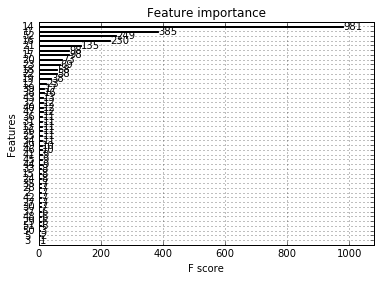

In [65]:
# plot the important feature
import xgboost
%matplotlib inline
xgboost.plot_importance(gbm.booster())

In [83]:
result = gbm.booster().get_fscore()
se = pd.Series(result)
important_feature = pd.to_numeric(se[lambda x: x>30].index) 
training_important = training[important_feature]

In [84]:
important_feature

Int64Index([0, 1, 12, 14, 16, 17, 18, 19, 20, 21, 22, 23, 25, 52], dtype='int64')

In [85]:
from sklearn.cross_validation import train_test_split
training_data, testing_data, training_label, testing_label = train_test_split(training_important, label, random_state=456, 
                                                                  test_size=0.2, stratify=label)

In [86]:
gbm.set_params(**{'n_estimators':2000, 'learning_rate':0.9})
gbm.fit(training_data, training_label, 
        eval_set = [(training_data, training_label), (testing_data, testing_label)],
        eval_metric = 'auc', verbose=True)

[0]	validation_0-auc:0.891234	validation_1-auc:0.891387
[1]	validation_0-auc:0.899765	validation_1-auc:0.899817
[2]	validation_0-auc:0.902464	validation_1-auc:0.902406
[3]	validation_0-auc:0.908928	validation_1-auc:0.908936
[4]	validation_0-auc:0.917298	validation_1-auc:0.917493
[5]	validation_0-auc:0.918297	validation_1-auc:0.918418
[6]	validation_0-auc:0.918863	validation_1-auc:0.919007
[7]	validation_0-auc:0.920307	validation_1-auc:0.920464
[8]	validation_0-auc:0.921193	validation_1-auc:0.921378
[9]	validation_0-auc:0.92227	validation_1-auc:0.922445
[10]	validation_0-auc:0.923	validation_1-auc:0.923246
[11]	validation_0-auc:0.923756	validation_1-auc:0.923978
[12]	validation_0-auc:0.924885	validation_1-auc:0.925186
[13]	validation_0-auc:0.925276	validation_1-auc:0.925549
[14]	validation_0-auc:0.926403	validation_1-auc:0.926631
[15]	validation_0-auc:0.927345	validation_1-auc:0.927592
[16]	validation_0-auc:0.928171	validation_1-auc:0.928405
[17]	validation_0-auc:0.928617	validation_1-a

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.9, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=2000, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)